In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("/content/healthcare_dataset.csv")

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
data["Date of Admission"] = pd.to_datetime(data['Date of Admission'])
data["Discharge Date"] = pd.to_datetime(data['Discharge Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [23]:
len(data['Name'].unique())
len(data['Gender'].unique())
len(data['Blood Type'].unique())
len(data['Medical Condition'].unique())
len(data['Doctor'].unique())
len(data['Hospital'].unique())
len(data['Insurance Provider'].unique())
len(data['Admission Type'].unique())
len(data['Medication'].unique())
len(data['Test Results'].unique())

3

In [26]:
# print(data['Gender'].unique())
print(data['Blood Type'].unique())
print(data['Medical Condition'].unique())
print(data['Insurance Provider'].unique())
print(data['Admission Type'].unique())
print(data['Medication'].unique())
print(data['Test Results'].unique())

['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
['Elective' 'Emergency' 'Urgent']
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
['Inconclusive' 'Normal' 'Abnormal']


In [28]:
data['BloodGroup'] = data['Blood Type'].apply(lambda x: x[:-1])
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,BloodGroup
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,O
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,O
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,B
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,B
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,O


In [62]:
data['TimeStayed'] = data['Discharge Date'] - data['Date of Admission']
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,BloodGroup,TimeStayed,Medication_Length
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,O,14 days,LongTerm
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,O,14 days,LongTerm
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,B,30 days,LongTerm
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,B,1 days,LongTerm
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,O,24 days,LongTerm


In [36]:
fig = px.sunburst(data, path=['Gender'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Gender",
                  width=500,
                  height=500)
fig.show()

In [37]:
fig = px.sunburst(data, path=['Medical Condition'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Medical Condition",
                  width=500,
                  height=500)
fig.show()

In [39]:
fig = px.sunburst(data, path=['Admission Type'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Admission Type",
                  width=500,
                  height=500)
fig.show()

In [40]:
fig = px.sunburst(data, path=['Medication'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Medication",
                  width=500,
                  height=500)
fig.show()

In [42]:
fig = px.sunburst(data, path=['Medical Condition','Medication'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Medication for Medical Condition",
                  width=800,
                  height=800)
fig.show()

In [43]:
fig = px.sunburst(data, path=['Medical Condition','Admission Type'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Admission Type for Medical Condition",
                  width=800,
                  height=800)
fig.show()

In [46]:
fig = px.sunburst(data, path=['Test Results'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Test Result",
                  width=500,
                  height=500)
fig.show()

In [47]:
fig = px.histogram(data[data['Medical Condition']=='Cancer'], x='TimeStayed')
fig.show()

In [48]:
fig = px.histogram(data[data['Medical Condition']=='Asthma'], x='TimeStayed')
fig.show()

In [49]:
data[data['Medical Condition']=='Asthma']['TimeStayed'].describe()

count                          1708
mean     15 days 11:33:01.264637002
std       8 days 15:35:31.891899018
min                 1 days 00:00:00
25%                 8 days 00:00:00
50%                16 days 00:00:00
75%                23 days 00:00:00
max                30 days 00:00:00
Name: TimeStayed, dtype: object

In [65]:
data['TimeStayed'] = data['TimeStayed'].apply(lambda x : x.days)
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,BloodGroup,TimeStayed,Medication_Length
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,O,14,LongTerm
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,O,14,LongTerm
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,B,30,LongTerm
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,B,1,LongTerm
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,O,24,LongTerm


In [66]:
data['Medication_Length'] = data['TimeStayed'].apply(lambda x :
                                                     "LongTerm" if x > 10 else
                                                     "ShortTerm" if x > 5 and x <=10 else
                                                     "OutPatient")

In [67]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,BloodGroup,TimeStayed,Medication_Length
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,O,14,LongTerm
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,O,14,LongTerm
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,B,30,LongTerm
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,B,1,OutPatient
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,O,24,LongTerm


In [68]:
fig = px.sunburst(data, path=['Medical Condition','Medication_Length'])
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title_text="Patient Length for Medical Condition",
                  width=800,
                  height=800)
fig.show()

# **Model Traning**

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

1. Data Load
2. Data Explore (Info, Describe and Null Values, Outliers)
3. EDA (univariate analysis, bi-variate analysis)
4. Baseline Model (all columns to numerical columns)
5. Transformations, Build New Columns
6. First Model vs Baseline Model

In [98]:
label_encoder = LabelEncoder()
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])

cat_cols = ['Blood Type','Medical Condition','Insurance Provider','Admission Type','Medication']
num_cols = ['Age','Room Number','Billing Amount']
X = data[cat_cols + num_cols]
Y = data['Test Results']

In [119]:
X_new = pd.get_dummies(X, columns = cat_cols)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.25,random_state=42)

In [115]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

0.3484
0.3468
              precision    recall  f1-score   support

           0       0.34      0.91      0.50      2573
           1       0.38      0.10      0.15      2491
           2       0.55      0.02      0.03      2436

    accuracy                           0.35      7500
   macro avg       0.43      0.34      0.23      7500
weighted avg       0.42      0.35      0.23      7500

              precision    recall  f1-score   support

           0       0.35      0.90      0.51       883
           1       0.30      0.08      0.13       786
           2       0.35      0.01      0.02       831

    accuracy                           0.35      2500
   macro avg       0.33      0.33      0.22      2500
weighted avg       0.34      0.35      0.22      2500



In [116]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

LogisticRegression(multi_class='multinomial')

0.3429333333333333
0.352
              precision    recall  f1-score   support

           0       0.34      0.99      0.51      2573
           1       0.35      0.01      0.02      2491
           2       0.00      0.00      0.00      2436

    accuracy                           0.34      7500
   macro avg       0.23      0.33      0.18      7500
weighted avg       0.23      0.34      0.18      7500

              precision    recall  f1-score   support

           0       0.35      0.99      0.52       883
           1       0.30      0.01      0.02       786
           2       0.00      0.00      0.00       831

    accuracy                           0.35      2500
   macro avg       0.22      0.33      0.18      2500
weighted avg       0.22      0.35      0.19      2500



In [122]:
model.coef_

array([[ 1.75347049e-05,  4.12203131e-05,  4.57707538e-07,
        -9.02806043e-08,  1.85187652e-07, -7.60092645e-09,
         2.17975416e-07, -1.75606952e-07,  1.35889959e-07,
        -5.42656000e-08,  2.00058799e-08, -1.64455584e-07,
         2.62063399e-07, -4.07313159e-08, -1.89382976e-07,
         3.14005183e-07,  4.98061174e-08,  5.12710740e-08,
         7.71735178e-08,  1.28148290e-07, -1.61013029e-07,
         1.35724971e-07, -2.36195173e-07,  1.86921123e-07,
         2.80578875e-07, -1.31488860e-07, -8.92378887e-09,
         3.42888846e-07,  1.00697711e-07, -7.18690840e-08],
       [-2.79650403e-05, -6.62766462e-05,  7.92620939e-07,
        -1.74573773e-07, -1.59119936e-07, -3.56970155e-08,
        -1.66334223e-09,  2.65775244e-07, -1.97003380e-07,
         1.84933544e-07, -1.11722703e-07,  3.22978176e-08,
        -3.23550907e-08, -1.46475165e-07,  2.31337370e-08,
         2.43634415e-09, -1.08109005e-07, -1.59385157e-07,
        -4.47271888e-08, -2.61107391e-07,  7.60367536e-

In [158]:
label_encoder = LabelEncoder()
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])

cat_cols = ['BloodGroup','Medical Condition','Insurance Provider','Admission Type','Medication','Medication_Length']
num_cols = ['Billing Amount','TimeStayed']
X = data[cat_cols + num_cols]
Y = data['Test Results']

In [159]:
X_new = pd.get_dummies(X, columns = cat_cols)
X_train, X_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.25,random_state=42)

In [160]:
estimator = DecisionTreeClassifier()

selector = RFE(estimator, n_features_to_select=12, step=1)
selector = selector.fit(X_train, y_train)

In [161]:
X_train = X_train[X_train.columns[selector.support_]]
X_test = X_test[X_test.columns[selector.support_]]

In [162]:
scaler = StandardScaler()
X_train['Billing Amount'] = scaler.fit_transform(X_train['Billing Amount'].values.reshape(-1,1))
X_test['Billing Amount'] = scaler.transform(X_test['Billing Amount'].values.reshape(-1,1))

In [163]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

0.3509333333333333
0.328
              precision    recall  f1-score   support

           0       0.35      0.55      0.43      2573
           1       0.35      0.26      0.30      2491
           2       0.36      0.23      0.28      2436

    accuracy                           0.35      7500
   macro avg       0.35      0.35      0.34      7500
weighted avg       0.35      0.35      0.34      7500

              precision    recall  f1-score   support

           0       0.35      0.54      0.42       883
           1       0.27      0.21      0.23       786
           2       0.34      0.21      0.26       831

    accuracy                           0.33      2500
   macro avg       0.32      0.32      0.31      2500
weighted avg       0.32      0.33      0.31      2500



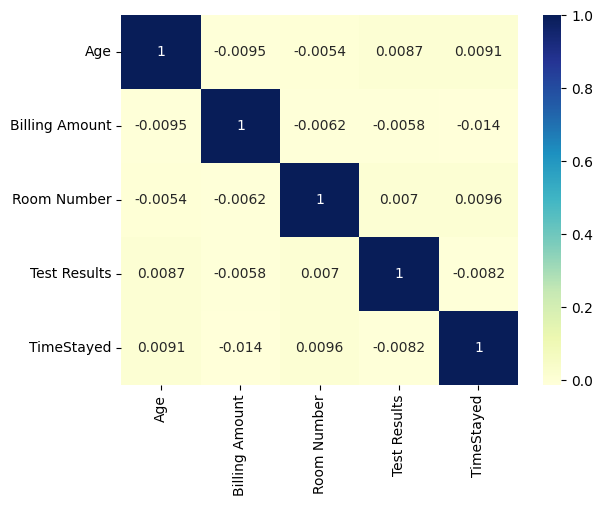

In [166]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)